In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [105]:
#pip install Visualizer

In [106]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [107]:
print(train.shape)
print(test.shape)

(6922, 80)
(2308, 80)


In [108]:
train.drop("Unnamed: 0", axis = 1, inplace = True)
test.drop("Unnamed: 0", axis = 1, inplace = True)

In [109]:
train.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)
test.sample(frac = 0.1).reset_index().drop("index", axis = 1, inplace = True)

In [110]:
x_train = train.drop("Converted", axis = 1)
y_train = train.iloc[:, -1]
x_test = test.drop("Converted", axis = 1)
y_test = test.iloc[:, -1]

In [111]:
pd.set_option('display.max_columns', 500)

In [112]:
x_train.head()

,Tags_Will revert after reading the email,Total Time Spent on Website,Lead Profile_Potential Lead,Last Notable Activity_SMS Sent,Lead Origin_Lead Add Form,Tags_Interested in other courses,Last Activity_SMS Sent,Tags_Ringing,What is your current occupation_Working Professional,Lead Source_Reference,Lead Profile_Unspecified,What is your current occupation_Unemployed,Tags_Closed by Horizzon,Last Notable Activity_Modified,Last Activity_Olark Chat Conversation,Lead Source_Welingak Website,Specialization_Unspecified,Lead Source_Olark Chat,Tags_Still Thinking,Last Activity_Converted to Lead,Tags_switched off,Last Notable Activity_View in browser link Clicked,Tags_Interested in Next batch,Last Notable Activity_Email Link Clicked,Tags_Interested in full time MBA,Tags_Lateral student,Last Activity_Page Visited on Website,Last Notable Activity_Olark Chat Conversation,Last Activity_Email Bounced,City_Tier II Cities,Tags_opp hangup,Tags_Recognition issue (DEC approval),Tags_Lost to EINS,Lead Profile_Student of SomeSchool,Lead Source_Social Media,Do Not Email_Yes,Last Activity_Email Marked Spam,Lead Source_WeLearn,Lead Profile_Other Leads,Specialization_Finance Management,Specialization_E-COMMERCE,City_Other Cities of Maharashtra,Tags_Shall take in the next coming month,Tags_Lost to Others,TotalVisits,Specialization_Hospitality Management,How did you hear about X Education_Word Of Mouth,Specialization_Retail Management,How did you hear about X Education_Student of SomeSchool,Lead Source_Press_Release,City_Thane & Outskirts,Tags_Graduation in progress,Tags_In confusion whether part time or DLP,How did you hear about X Education_Unspecified,Lead Source_Pay per Click Ads,Tags_Diploma holder (Not Eligible),Tags_Not doing further education,Lead Origin_Lead Import,Lead Source_NC_EDM,Specialization_Operations Management,Specialization_Supply Chain Management,Last Notable Activity_Had a Phone Conversation,Lead Source_Live Chat,Lead Source_Organic Search,Tags_University not recognized,City_Unspecified,Specialization_Media and Advertising,Page Views Per Visit,A free copy of Mastering The Interview_Yes,Last Activity_Email Link Clicked,Last Notable Activity_Form Submitted on Website,Lead Source_Others,How did you hear about X Education_SMS,City_Other Cities,Last Notable Activity_Page Visited on Website,Tags_number not provided,Last Notable Activity_Email Marked Spam,Tags_invalid number
0,1,-0.737186,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.383861,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.169195,1,0,0,0,0,0,0,0,0,0
1,0,0.200558,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.285678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.794993,0,0,0,0,0,0,0,0,0,0
2,0,1.972054,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.016039,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.130628,1,0,0,0,0,0,0,0,0,0
3,1,-0.815635,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.383861,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.169195,0,0,0,0,0,0,0,0,0,0
4,0,-0.427037,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0.450908,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.530766,1,0,0,0,0,0,0,0,0,0


In [113]:
ct = ColumnTransformer([('se', StandardScaler(), ['Total Time Spent on Website', 'Page Views Per Visit', 'TotalVisits'])], remainder='passthrough')

In [114]:
random_forest_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(random_state = 42))])
adaboost_pipeline = Pipeline([('transformer', ct), ('Adaboost', AdaBoostClassifier(random_state = 42))])
ExtraTree_pipeline = Pipeline([('transformer', ct), ('ExtraTreeClassifier', ExtraTreesClassifier(random_state = 42))])
BaggingClassifier_pipeline = Pipeline([('transformer', ct), ('BaggingClassifier', BaggingClassifier(estimator = DecisionTreeClassifier(), random_state = 42))])
GradientBoost_pipeline = Pipeline([('transformer', ct), ('GradientBoosting', GradientBoostingClassifier(random_state = 42))])
dtree_pipeline = Pipeline([('transformer', ct), ('DecisionTree', DecisionTreeClassifier(random_state = 42))])
knn_pipeline = Pipeline([('transformer', ct), ('KNN', KNeighborsClassifier())])
lr_pipeline = Pipeline([('transformer', ct), ('LogisticRegression', LogisticRegression(random_state = 42))])
sgd_pipeline = Pipeline([('transformer', ct), ('StochasticGradient', SGDClassifier(random_state = 42))])
mlp_pipeline = Pipeline([('transformer', ct), ('MLPClassifier', MLPClassifier(random_state = 42))])
naive_pipeline = Pipeline([('transformer', ct), ('NaiveBayes', GaussianNB())])
svc_pipeline = Pipeline([('transformer', ct), ('SVM', SVC(random_state = 42))])
lightgbm_pipeline = Pipeline([('transformer', ct), ('lightgbm', LGBMClassifier(random_state = 42))])
catboost_pipeline = Pipeline([('transformer', ct), ('CatBoost', CatBoostClassifier(random_state = 42, silent = True))])
xgboost_pipeline = Pipeline([('transformer', ct), ('XGBoost', XGBClassifier(random_state = 42))])

In [115]:
pipeline_list = [random_forest_pipeline, adaboost_pipeline, ExtraTree_pipeline, BaggingClassifier_pipeline, GradientBoost_pipeline,
                dtree_pipeline, knn_pipeline, lr_pipeline, sgd_pipeline, mlp_pipeline, naive_pipeline, svc_pipeline,
                lightgbm_pipeline, catboost_pipeline, xgboost_pipeline]

In [116]:
pipe_dict = {0: "RandomForest", 1: "Adaboost", 2: "ExtraTree", 3: "BaggingClassifier", 4: "GradientBoosting", 5: "DecisionTree",
            6: "KNN", 7: "Logistic", 8: "SGD Classifier", 9: "MLPClassifier", 10: "NaiveBayes",
            11: "SVM", 12: "LightGBM", 13: "Catboost", 14: "XGBoost"}

In [117]:
for idx, pipe in enumerate(pipeline_list):
    score = cross_val_score(pipe, x_train, y_train, cv = 10, scoring = 'accuracy')
    print(pipe_dict[idx], ":", score.mean())

RandomForest : 0.9063846558066212
Adaboost : 0.901907180808915
ExtraTree : 0.9008954115890532
BaggingClassifier : 0.9006061857217926
GradientBoosting : 0.9125960263243501
DecisionTree : 0.8747460150639341
KNN : 0.8873168097156536
Logistic : 0.9043602832620173
SGD Classifier : 0.9008945774841728
MLPClassifier : 0.9008931178006323
NaiveBayes : 0.8601548098657925
SVM : 0.9095617612958653
[LightGBM] [Info] Number of positive: 2388, number of negative: 3841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 467
[LightGBM] [Info] Number of data points in the train set: 6229, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383368 -> initscore=-0.475277
[LightGBM] [Info] Start training from score -0.475277
[LightGBM] [Info] Number of positive: 2388, number of nega

Based on the above results, we will be choosing the **RandomForest Classifier, GradientBoosting, LightGBM & Catboost** on which we are going to test the other metrics to see in depth performance of these 4 models based on several different metrics to choose the best model for our analysis.

In [119]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    model = model.fit(x_train, y_train)
    predict_train_y = model.predict(x_train)
    predict_test_y = model.predict(x_test)
    
    print("**Accuracy Score**")
    train_accuracy = accuracy_score(y_train, predict_train_y)
    test_accuracy = accuracy_score(y_test, predict_test_y)
    print("Train Accuracy is: %s"%(train_accuracy))
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    train_error = (1-train_accuracy)
    test_error = (1-test_accuracy)
    print("Train Error: %s"%(train_error))
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    train_cf_report = pd.DataFrame(classification_report(y_train, predict_train_y, output_dict = True))
    test_cf_report = pd.DataFrame(classification_report(y_test, predict_test_y, output_dict = True))
    print("Train Classification Report:")
    print(train_cf_report)
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    train_conf = confusion_matrix(y_train, predict_train_y)
    test_conf = confusion_matrix(y_test, predict_test_y)
    print("Train Confusion Matrix Report:")
    print((train_conf))
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

### RANDOM FOREST CLASSIFIER

In [121]:
rforest = RandomForestClassifier(random_state= 42)

In [122]:
evaluate_model(rforest, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.985408841375325

Test Accuracy is: 0.9137781629116117
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.014591158624674971

Test Error: 0.08622183708838826
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.980623     0.993429  0.985409     0.987026      0.985533
recall        0.996017     0.968350  0.985409     0.982183      0.985409
f1-score      0.988260     0.980729  0.985409     0.984494      0.985372
support    4268.000000  2654.000000  0.985409  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910143    0.920143  0.913778     0.915143      0.914060
recall        0.952279    0.853982  0.913778     0.903131      0.913778
f1-score      0.930734    0.885829  

### GRADIENT BOOSTING CLASSIFIER

In [124]:
GradientBoost = GradientBoostingClassifier(random_state = 42)

In [125]:
evaluate_model(GradientBoost, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9192429933545219

Test Accuracy is: 0.9155112651646448
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.08075700664547814

Test Error: 0.08448873483535524
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.910378     0.935913  0.919243     0.923146      0.920169
recall        0.963918     0.847400  0.919243     0.905659      0.919243
f1-score      0.936383     0.889460  0.919243     0.912922      0.918392
support    4268.000000  2654.000000  0.919243  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.910945    0.923536  0.915511     0.917241      0.915877
recall        0.954416    0.855088  0.915511     0.904752      0.915511
f1-score      0.932174    0.887995  

### LIGHTGBM CLASSIFIER

In [127]:
lgbm = LGBMClassifier(random_state=42)

In [128]:
evaluate_model(lgbm, x_train, y_train, x_test, y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2654, number of negative: 4268
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 469
[LightGBM] [Info] Number of data points in the train set: 6922, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383415 -> initscore=-0.475077
[LightGBM] [Info] Start training from score -0.475077
**Accuracy Score**
Train Accuracy is: 0.9459693730135799

Test Accuracy is: 0.9172443674176777
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05403062698642014

Test Error: 0.08275563258232232
---------------------------------------------------------

**Classification Report**
Train Classification Report:
             

### CATBOOST CLASSIFIER

In [130]:
catboost_classif = CatBoostClassifier(random_state=42, silent = True)

In [131]:
evaluate_model(catboost_classif, x_train, y_train, x_test, y_test)

**Accuracy Score**
Train Accuracy is: 0.9422132331696041

Test Accuracy is: 0.9207105719237435
---------------------------------------------------------

**Accuracy Error**
Train Error: 0.05778676683039585

Test Error: 0.0792894280762565
---------------------------------------------------------

**Classification Report**
Train Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.936766     0.951885  0.942213     0.944325      0.942563
recall        0.971884     0.894499  0.942213     0.933191      0.942213
f1-score      0.954002     0.922300  0.942213     0.938151      0.941847
support    4268.000000  2654.000000  0.942213  6922.000000   6922.000000

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.920744    0.920653  0.920711     0.920699      0.920709
recall        0.951567    0.872788  0.920711     0.912177      0.920711
f1-score      0.935902    0.896082  0

## Models Evaluation & Performance Benchmarking
<img src = "https://storage.googleapis.com/kaggle-media/launches/model-evaluation-workshop/model-evaluation-spot.png">

#### A) Model Accuracy:

**1) Random Forest:** When it comes to train accuracy, Random Forest have the accuracy of 98.4677% while test accuracy has been declined to 91.693% which is significant drop.

**2) Gradient Boosting:** For train dataset, we have a accuracy score of 91.7350% while for test dataset, we have a accuracy score of 91.657% which is pretty good as there is no much accuracy drop as compared to Random Forest.

**3) LightGBM:** The LightGBM algorithm gives us a train accuracy of 94.582% while test accuracy of 91.549%.

**4) CatBoost:** Under Catboost, we have a train accuracy of 94.05% while test accuracy of 92.018%. In Catboost algorithm, we have the highest test accuracy as compared to Random Forest, Gradient Boosting, LightGBM.

#### B) Model Precision:
**1) Random Forest:** When it comes to train precision for our class labels, we have a precision score of 97.95% for class label "0" and 99.30% for class label "1" while on test dataset this has been reduced. On testing dataset, precision score for class label "0" is coming out to be 91.84% while for class label "1" it is coming out to be 91.42%.

This indicating that our model requires parameters needs to be change as the score has come down significantly on the testing dataset.

**2) Gradient Boosting:** On our training data for class label "0" we have a precision score of 90.71% while for class label "1" we have a precision score of 93.63%,

On testing dataset for our class label "0" this has been increased from 90.71% to 91.37% while for class label "1" this is slightly down i.e; 92.18% but still it is pretty good as compared to Random Forest.

**3) Light GBM:** When it comes to Light GBM, our training precision score for class label "0" is coming out to be 94.12% while for class label "1" it is coming 95.37%.

As far as the testing dataset concern, the precision score of class label "0" is coming out to be 92.11% while for class label "1" it is coming out to be 90.56%.

**4) CatBoost:** Under CatBoost, for class label "0" under training dataset our precision score is coming out to be 93.43% while for class label "1" it is coming out to be 95.15%.

For testing dataset, the precision score class label "0" it is slightly down from 93.43% to 92.07% while for class label "1" it is coming out to be 91.91%.

#### C) F1-Score:

**1) Random Forest:** If we take a look at the F1-Score for Random Forest Classifier on training dataset, it is coming out to be 98.75% for class label "0" while 97.99% for class label "1".

On testing dataset, our F1-score has come down from 98.75% to 93.42% for class label "0" while for class label "1" it is coming out to be 88.73% which is again huge drop.

**2) Gradient Boosting:** On training dataset for class label "0" our F1-score is coming out to be 93.45% while for class label "1" it is coming as 88.80%. For testing dataset, the F1-score for class label "0" has been reduced to 93.42% while for class label "1" it is 88.58%.

**3) LightGBM:** On training dataset for class label "0" our F1-score is coming out to be 95.64% while for class label "1" it is coming as 92.83%. For testing dataset, the F1-score for class label "0" has been reduced to 93.27% while for class label "1" it is 88.62%.

**4) CatBoost:** On training dataset for class label "0" our F1-score is coming out to be 95.23% while for class label "1" it is coming as 92.09%. For testing dataset, the F1-score for class label "0" has been increased to 93.68% while for class label "1" it is 89.17%.

Also when it comes to confusion matrix, we are looking to increase our TP (True Positive) & TN (True Negative) as well as aiming to reduce the FN (False Negative). So for further analysis, we are taking random forest classifier and catboost classifier on which we're going to perform the hyper parameter tuning. 

### Random Forest Hyperparameter Tuning

In [135]:
new_pipeline = Pipeline([('transformer', ct), ('classifier', RandomForestClassifier(random_state=42))])

In [136]:
rf_params = [{
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': np.arange(100,2000, 200),
                'classifier__max_depth': [None, 10, 20, 30, 50, 70, 80, 100],
                'classifier__min_samples_split': [2, 3, 5, 7, 10],
                'classifier__min_samples_leaf': [1,2,3,4,5,],
                'classifier__max_features': ['auto', 'sqrt', 'log2'],
                'classifier__bootstrap': [True, False]
               }]

In [153]:
random_search = RandomizedSearchCV(estimator = new_pipeline, param_distributions = rf_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [155]:
best_rf_model = random_search.fit(x_train, y_train)

In [156]:
best_rf_model.best_params_

{'classifier__n_estimators': 1300,
 'classifier__min_samples_split': 5,
 'classifier__min_samples_leaf': 4,
 'classifier__max_features': 'log2',
 'classifier__max_depth': 70,
 'classifier__bootstrap': True,
 'classifier': RandomForestClassifier()}

In [157]:
print("Best Score: %s" %(best_rf_model.best_score_))

Best Score: 0.9082620173660636


In [158]:
best_rf_model.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=70, max_features='log2',
                                        min_samples_leaf=4, min_samples_split=5,
                                        n_estimators=1300))])

In [178]:
rf_classif_pipeline = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', bootstrap = False, max_depth = None, random_state = 42))])

In [180]:
rf_classif_pipeline.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [181]:
test_prediction = rf_classif_pipeline.predict(x_test)

In [184]:
accuracy_score(y_test, test_prediction)

0.9202772963604853

In [186]:
def check_metric(y_test, y_predict):
    
    print("**Accuracy Score**")
    test_accuracy = accuracy_score(y_test, y_predict)
    print("\nTest Accuracy is: %s"%(test_accuracy))
    print("---------------------------------------------------------")
    
    print("\n**Accuracy Error**")
    test_error = (1-test_accuracy)
    print("\nTest Error: %s"%(test_error))
    print("---------------------------------------------------------")
    
    print("\n**Classification Report**")
    test_cf_report = pd.DataFrame(classification_report(y_test, y_predict, output_dict = True))
    print("\n Test Classification Report:")
    print(test_cf_report)
    print("---------------------------------------------------------")
    
    print("\n**Confusion Matrix**")
    test_conf = confusion_matrix(y_test, y_predict)
    print("\n Test Confusion Matrix Report:")
    print((test_conf))

In [188]:
check_metric(y_test, test_prediction)

**Accuracy Score**

Test Accuracy is: 0.9202772963604853
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.07972270363951472
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.915531    0.928571  0.920277     0.922051      0.920639
recall        0.957265    0.862832  0.920277     0.910048      0.920277
f1-score      0.935933    0.894495  0.920277     0.915214      0.919703
support    1404.000000  904.000000  0.920277  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1344   60]
 [ 124  780]]


### Cat Boost Hyperparameter Tuning

In [191]:
cb_new_pipeline = Pipeline([('transformer', ct), ('classifier', CatBoostClassifier(random_state=42, task_type = 'CPU', silent = True, eval_metric = 'accuracy'))])

In [193]:
catboost_params = [{
    'classifier': [CatBoostClassifier()],
    'classifier__iterations': [10],
    'classifier__learning_rate': [0.0001, 0.001, 0.003, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0],
    'classifier__depth': [2,4,6,8,10,12],
    'classifier__l2_leaf_reg': [2,3,5,7,9,11,12,15,18,20,25,27],
    'classifier__random_strength': [1],
    'classifier__border_count': [50, 100, 150, 200, 254],
}]

In [195]:
cb_random_search = RandomizedSearchCV(estimator = cb_new_pipeline, param_distributions = catboost_params, scoring = 'accuracy', n_jobs = -1, cv = 10, random_state = 42)

In [197]:
cb_random_search.fit(x_train, y_train)

0:	learn: 0.3555980	total: 5ms	remaining: 45ms
1:	learn: 0.2643797	total: 10.1ms	remaining: 40.4ms
2:	learn: 0.2433551	total: 14ms	remaining: 32.6ms
3:	learn: 0.2282052	total: 18.1ms	remaining: 27.2ms
4:	learn: 0.2215780	total: 22.3ms	remaining: 22.3ms
5:	learn: 0.2158500	total: 26.2ms	remaining: 17.5ms
6:	learn: 0.2094674	total: 30.1ms	remaining: 12.9ms
7:	learn: 0.2053063	total: 34.2ms	remaining: 8.55ms
8:	learn: 0.2022252	total: 38.2ms	remaining: 4.25ms
9:	learn: 0.1981677	total: 42.3ms	remaining: 0us


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('se',
                                                                               StandardScaler(),
                                                                               ['Total '
                                                                                'Time '
                                                                                'Spent '
                                                                                'on '
                                                                                'Website',
                                                                                'Page '
                                                                                'Views '
                                                                                'Per '
                                                                                'Visit',
                                                                                'TotalVisits'])])),
                                             ('classifier',
                                              <catboost.core.CatBoostClassifier object at 0x00000144883A2240>)]),
                   n_jobs=-1,
                   param_distributions=[{'classifier': [<...object at 0x000001448B79F560>],
                                         'classifier__border_count': [50, 100,
                                                                      150, 200,
                                                                      254],
                                         'classifier__depth': [2, 4, 6, 8, 10,
                                                               12],
                                         'classifier__iterations': [10],
                                         'classifier__l2_leaf_reg': [2, 3, 5, 7,
                                                                     9, 11, 12,
                                                                     15, 18, 20,
                                                                     25, 27],
                                         'classifier__learning_rate': [0.0001,
                                                                       0.001,
                                                                       0.003,
                                                                       0.005,
                                                                       0.01,
                                                                       0.05,
                                                                       0.1, 0.5,
                                                                       1.0],
                                         'classifier__random_strength': [1]}],
                   random_state=42, scoring='accuracy')

In [198]:
cb_random_search.best_params_

{'classifier__random_strength': 1,
 'classifier__learning_rate': 0.5,
 'classifier__l2_leaf_reg': 7,
 'classifier__iterations': 10,
 'classifier__depth': 10,
 'classifier__border_count': 50,
 'classifier': <catboost.core.CatBoostClassifier at 0x1448b79f560>}

In [201]:
cb_random_search.best_score_

0.9088394264694843

In [203]:
catboost_model = CatBoostClassifier(random_strength=1, learning_rate=0.5, l2_leaf_reg=7, iterations=10, depth=10, border_count=50, 
                                    silent = True, eval_metric='Accuracy', task_type='CPU')

In [205]:
catboost_model.fit(x_train, y_train, silent = True, plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [207]:
y_test_predict = catboost_model.predict(x_test)

In [209]:
check_metric(y_test, y_test_predict)

**Accuracy Score**

Test Accuracy is: 0.9133448873483535
---------------------------------------------------------

**Accuracy Error**

Test Error: 0.0866551126516465
---------------------------------------------------------

**Classification Report**

 Test Classification Report:
                     0           1  accuracy    macro avg  weighted avg
precision     0.912894    0.914118  0.913345     0.913506      0.913374
recall        0.948006    0.859513  0.913345     0.903759      0.913345
f1-score      0.930119    0.885975  0.913345     0.908047      0.912828
support    1404.000000  904.000000  0.913345  2308.000000   2308.000000
---------------------------------------------------------

**Confusion Matrix**

 Test Confusion Matrix Report:
[[1331   73]
 [ 127  777]]


## Final Model

In [216]:
random_forest = Pipeline([('transformer', ct), ('RandomForest', RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 2, max_features = 'sqrt', bootstrap = False, max_depth = None, random_state = 42))])

In [218]:
random_forest.fit(x_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('se', StandardScaler(),
                                                  ['Total Time Spent on '
                                                   'Website',
                                                   'Page Views Per Visit',
                                                   'TotalVisits'])])),
                ('RandomForest',
                 RandomForestClassifier(bootstrap=False, min_samples_leaf=2,
                                        min_samples_split=10, n_estimators=300,
                                        random_state=42))])

In [219]:
y_train_predict = random_forest.predict(x_train)

In [221]:
y_test_predict = random_forest.predict(x_test)

In [224]:
print("Train Accuracy: %s"%(accuracy_score(y_train, y_train_predict)))
print("Test Accuracy: %s"%(accuracy_score(y_test, y_test_predict)))

Train Accuracy: 0.9436579023403641
Test Accuracy: 0.9202772963604853


In [226]:
x_train.loc[:, "Actual Class"] = y_train
x_train.loc[:, "Predicted Class"] = y_train_predict
x_test.loc[:, "Actual Class"] = y_test
x_test.loc[:, "Predicted Class"] = y_test_predict

In [232]:
predicted_df = pd.concat([x_train, x_test], axis=0)

<Axes: title={'center': 'Predicted Class Label'}, ylabel='count'>

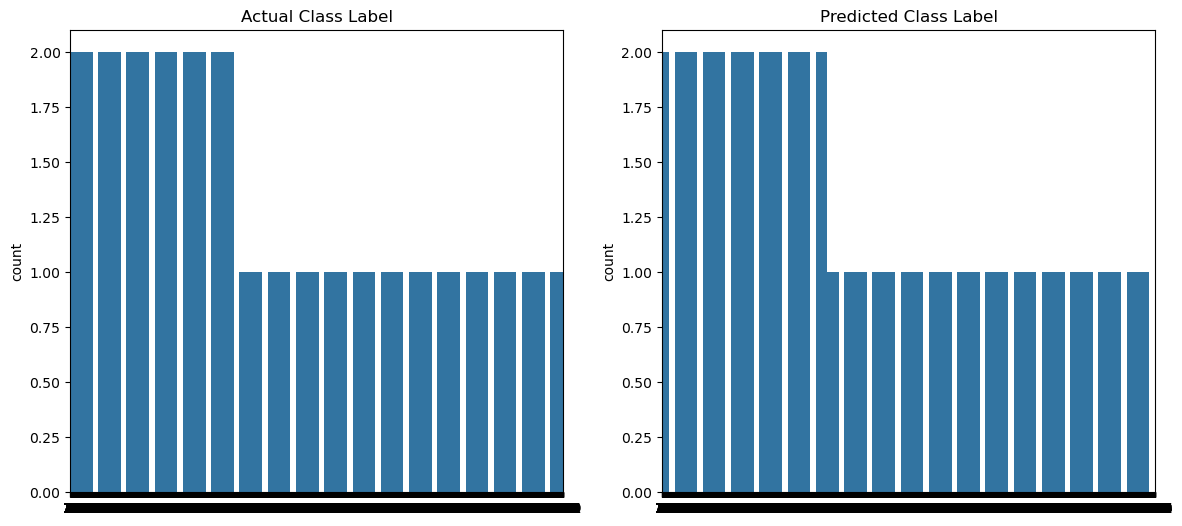

In [234]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Actual Class Label")
sns.countplot(predicted_df["Actual Class"])
plt.subplot(122)
plt.title("Predicted Class Label")
sns.countplot(predicted_df["Predicted Class"])